<div style="background:#FFFFEE; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFN619 - Data Analytics for Strategic Decision Makers (2024 Sem 1)</div>

# IFN619 :: UA2 - Extending Analytics (40%)

**IMPORTANT:** Refer to the instructions in Canvas [UA2 - Assignment 2 - extending analytics](https://canvas.qut.edu.au/courses/17432/assignments/163774) *BEFORE* working on this assignment.

#### REQUIREMENTS ####

1. Complete and run the code cell below to display your name, student number, and assignment option
2. Identify an appropriate question (or questions) to be addressed by your overall data analytics narrative
3. Extend your analysis in assignment 1 with:
    - the analysis of additional unstructured data using the Guardian API (See accessing the Guardian API notebook),
    - the use of one machine learning technique (as used in the class materials), and
    - identification of ethical considerations relevant to the analysis (by drawing on class materials).
4. Ensure that you include documentation of your thinking and decision-making using markdown cells
5. Ensure that you include appropriate visualisations, and that they support the overall narrative
6. Ensure that your insights answer your question/s and are appropriate to your narrative. 
7. Ensure that your insights are consistent with the ethical considerations identified.

**NOTE:** you should not repeat the analysis from assignment 1, but you may need to save dataframes from assignment 1 and reload for use in this assignment. You may also summarise your assignment 1 insights as part of the process of identifying questions for analysis.

#### SUBMISSION ####

1. Create an assignment 2 folder named in the form **UA2-surname-idnumber** and put your notebook and any data files inside this folder. Note, do not put large training data in this folder (reference any training data that you used but keep it outside this folder), only keep small data files and models in this folder with your notebook.
2. When you have everything in the correct folder, reset all cells and restart the kernel, then run the notebook completely, checking that all cells have run without error. If you encounter errors, fix your notebook and re-run the process. It is important that your notebook runs without errors only requiring the files in the folder that you have created.
3. When the notebook is error free, zip the entire folder (you can select download folder in Jupyter).
4. Submit the zipped folder on Canvas [UA2 - Assignment 2 - extending analytics](https://canvas.qut.edu.au/courses/17432/assignments/163774)


In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import HTML

# personal details
first_name = 'Tan Dat'
last_name = 'Huynh'
student_number = 'N11446927'

personal_header = f"<h1>{first_name} {last_name} ({student_number})</h1>"
HTML(personal_header)

---


## 1. Summary

## 2. Table of contents

* [1. Summary](#1.-Summary)
* [2. Table of contents](#2.-Table-of-contents)
* [3. Introduction](#3.-Introduction)
    - [3.1 Background](#3.1-Background)
    - [3.2 Stakeholders](#3.2-Stakeholders)
    - [3.3 Questions](#3.3-Questions)
* [4. Analysis](#4.-Analysis)
* [5. Conclusion](#5.-Conclusion)
* [6. Appendix](#6.-Appendix)
   

## 3. Introduction

### 3.1 Background

### 3.2 Stakeholders

### 3.3 Questions

How should the government support tourism and sport industry that attract more audiences?

## 4. Analysis

## 5. Conclusion

## 6. Appendix

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Structured data

First I look at data from Advance Queensland Funding Recipients dataset to extract the overview of granting scheme. I use several techniques to get data from Open Data Portal, fix the data type and replace missing values with N/A.

In [3]:
# import pandas as pd
# df_url = 'https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/0f97b985-f5c7-49d2-8b0a-bc5dfbe070b9/download/advance-queensland-funding-recipients.csv'
# df = pd.read_csv(df_url,encoding = "ISO-8859-1")
# #Fix column name
# df.columns = df.columns.str.strip()

# #Capture the column headings as a list
# df_headings = list(df.columns)

# #Print total of unique values for each column
# for col in df_headings:
#     print(f"{col}: {len(set(df[col]))}")
# # correct data types for analysis
# df['Actual Contractual Commitment ($)'] = pd.to_numeric(df['Actual Contractual Commitment ($)'].str.replace(',',''))
# df['Approval date'] = pd.to_datetime(df['Approval date'])

# # replace NaNs in multiple columns with the string 'N/A'
# columns = ['Round','University Collaborator (if applicable)','Other Partners; Collaborators (if applicable)','Primary Location of Activity/Project - Suburb','Multiple Locations of Activity/Project (if applicable)',]
# replace_value = 'N/A'
# df[columns] = df[columns].fillna(replace_value)

# # replace NaNs in Post Code with the value 0
# columns = ['Physical Address of Recipient - Post Code','Primary Location of Activity/Project - Post Code']
# replace_value = 0
# df[columns] = df[columns].fillna(replace_value) 
# df.head(5)

I want to know how the grants were distributed among the recipients. So I count the number of records by `Recipient Name`. Obviously there will be the case that the recipients got the funding money only once. To sort out remarkable recipients, I filter the number of grants by a threshold of 5. Originally, I filtered out the top-10 recipients but that might not be fair for others if they got the same counts.

In [4]:
# #pd.set_option('display.max_colwidth', None)  
# recp_df = df['Recipient Name'].value_counts().reset_index(name='Count')
# recp_df.loc[recp_df['Count'] >= 5]

The dataframe show that 11 out of 17 top recipients (by the number of grants) were research and educational organisations such as universities and institutes. However, I'm also curious about whether the quality (or the actual commitment) of grants aligned with such number of grants they received, by performing another aggregating techniques. 

In [5]:
# df.groupby(['Recipient Name'])['Actual Contractual Commitment ($)'].sum().sort_values(ascending=False).head(20)

According to the vision of Advance Queensland, one of the six priorities is **Research collaboration and commercialisation**. We can argue that this distribution is appropriate with the roadmap of the initiatives. However, is there any underlying story that people can dive deeper into? Then we come with some insights from the society, particularly in the articles from the Guardian platform.

### Gather data from Guardian API

First, I use API key to extract article's data from the platform. 

In [6]:
#import required libraries
import requests
import json
import re
import time

#load personal API key
with open('guardian_key.txt', 'r') as file:
    key = file.read().strip()

#build a search URL
base_url = 'https://content.guardianapis.com/'
search_string = 'Queensland AND (university OR institute OR researcher) AND (research study) AND (fund grant scholarship)'
search_string = search_string.replace(' ','%20')
search_string = search_string.replace('"','%22')
production_office = "aus"
from_date = "2015-09-01"
to_date = "2024-05-01"
full_url = base_url+f"search?q={search_string}&production-office={production_office}&from-date={from_date}&to-date={to_date}&show-fields=body&api-key={key}"

#prevent key revealing
#url = baseUrl+'"'+searchString+'"'+'&production-office='+production_office+'&from-date='+fromDate+&to-date='+toDate+'&api-key='+key
print(full_url[:120])

https://content.guardianapis.com/search?q=Queensland%20AND%20(university%20OR%20institute%20OR%20researcher)%20AND%20(re


In [7]:
# get data from server
server_response = requests.get(full_url)
server_data = server_response.json()
resp_data = server_data.get('response','')
if resp_data == '':
    print("ERROR obtaining results:",server_data)
else:
    print("SUCCESS!")
    print(f"{resp_data['total']} results found available in {resp_data['pages']} pages")
    print(f"{resp_data['pageSize']} results per page")
    results = resp_data.get('results',[])

SUCCESS!
23 results found available in 3 pages
10 results per page


In [8]:
def articles_from_page_results(page_results):
    articles = {}
    for result in page_results:
        article_date = result['webPublicationDate']
        article_title = result['webTitle']+f" [{article_date}]"
        article_html = result['fields']['body']
        article_text = re.sub(r'<.*?>','',article_html)
        articles[article_title] = article_text
    return articles

def get_all_articles_for_response(response_json,full_url):
    total_pages = response_json['pages']
    total_articles = response_json['total']
    #print(f"Fetching {total_articles} articles from {total_pages} pages...")
    all_articles = {}
    page1_articles = articles_from_page_results(response_json['results'])
    all_articles.update(page1_articles)
    #print("Added articles for page: 1")
    
    for page in range(2,total_pages+1):
        #print("Getting articles from API for page:",page)
        page_response = requests.get(full_url+f"&page={page}")
        page_data = page_response.json()['response']
        #print("Processing results for page:",page_data['currentPage'])
        page_articles = articles_from_page_results(page_data['results'])
        #print(f"Fetched {len(page_articles)} articles.")
        all_articles.update(page_articles)
        #print("Added articles for page:",page)
        #print(f"Status: {len(all_articles)} articles.")
        time.sleep(1) # make sure we're not hitting the API to hard
    
    print(f"FINISHED: Fetched {len(all_articles)} articles.")
    return all_articles

my_articles = get_all_articles_for_response(resp_data,full_url)

FINISHED: Fetched 23 articles.


Then, I save the data in json file to use as input for topic modelling

In [9]:
file_path = ""
file_name = "advance_queensland.json"

with open(f"{file_path}{file_name}",'w', encoding='utf-8') as fp:
    fp.write(json.dumps(my_articles))

### Text analysis

Once getting json files for articles, I can read them and perform unstructed analysis

In [10]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction import text
import pandas as pd
import json
import random

In [11]:
# Load the data - articles from The Guardian
file_path = ""
file_name = "advance_queensland.json"

with open(f"{file_path}{file_name}",'r', encoding='utf-8') as fp:
    articles = json.load(fp)

print(f"Loaded {len(articles)} articles from {file_name}")

Loaded 23 articles from advance_queensland.json


Then I create a dataframe to store top 10 terms for different approaches, naming `count`,`tfidf`, `nmf`, `lda`.

In [12]:
# Create a dataframe to hold top terms for each analysis type
terms_df = pd.DataFrame(index=articles.keys(),columns=['count','tfidf','nmf','lda'])
terms_df

,count,tfidf,nmf,lda
‘Peer influence is no joke’: Australian government to fund research into youth vaping prevention [2023-12-14T14:00:02Z],NaN,NaN,NaN,NaN
Ministers will no longer approve Australian Research Council grants under bid to stop ‘political interference’ [2023-11-29T05:51:54Z],NaN,NaN,NaN,NaN
Industry and states put pressure back on federal government over paid university placements [2024-02-29T04:24:52Z],NaN,NaN,NaN,NaN
Explainer: what’s the plan to tax international students and why is it needed? [2023-11-02T00:01:24Z],NaN,NaN,NaN,NaN
"Controversial grant decisions by Coalition ministers eroded trust in Australian Research Council, review finds [2023-04-20T06:55:53Z]",NaN,NaN,NaN,NaN
PM says ‘protections’ needed before funding can resume – as it happened [2024-01-29T07:20:16Z],NaN,NaN,NaN,NaN
From rural medicine to tech innovations: two trailblazers channel their studies into what matters [2023-11-20T03:21:35Z],NaN,NaN,NaN,NaN
Minister orders briefing on $33m grant – as it happened [2023-07-20T08:18:04Z],NaN,NaN,NaN,NaN
Academics welcome Australian Research Council overhaul following controversial grant decisions [2022-08-30T07:04:04Z],NaN,NaN,NaN,NaN
‘We shouldn’t be doing well’: how year 12s at one NSW school rose above disadvantage [2022-12-15T14:00:24Z],NaN,NaN,NaN,NaN


#### Term count

To count the frequency of terms in each document, I used CountVectorizer from scikit-learn. Knowing that some words should not be involved in the analyses whether they are not meaningful or repetitive, I add them to stop words list to remove their impact on information retrieval process. Obviously, `bst` or `gmt` are words marking the timestamp and apparently out of my consideration.

In [13]:
my_additional_stop_words = set(['bst','gmt','year','years','updated','month','covid','virus','reef','coronavirus','people'])
my_stop_words = list(text.ENGLISH_STOP_WORDS.union(my_additional_stop_words))

In [14]:
# Only count terms that in maximum of 75% of documents, and a minimum of 2 documents. 
# Count a maximum of 10000 terms, and remove common english stop words
count_vectorizer = CountVectorizer(max_df=0.8,min_df=10,max_features=10000,stop_words = my_stop_words)
count_dt_matrix = count_vectorizer.fit_transform(articles.values())

# Get the 1000 terms identified during the vectorization process
feature_names = count_vectorizer.get_feature_names_out()

# Create a new dataframe with the matrix - use titles for the index and terms for the columns
count_df = pd.DataFrame(count_dt_matrix.toarray(), index=articles.keys(), columns=feature_names)

In [15]:
#For each doc, get the 10 columns with the largest counts
for idx in terms_df.index:
    counts = dict(count_df.loc[idx].sort_values(ascending=False).head(10))
    #print(counts)
    terms_df.at[idx,'count'] = list(counts.keys()) # Just the list of terms

terms_df

,count,tfidf,nmf,lda
‘Peer influence is no joke’: Australian government to fund research into youth vaping prevention [2023-12-14T14:00:02Z],"[says, health, social, help, council, medical,...",NaN,NaN,NaN
Ministers will no longer approve Australian Research Council grants under bid to stop ‘political interference’ [2023-11-29T05:51:54Z],"[minister, education, projects, national, univ...",NaN,NaN,NaN
Industry and states put pressure back on federal government over paid university placements [2024-02-29T04:24:52Z],"[students, education, minister, work, federal,...",NaN,NaN,NaN
Explainer: what’s the plan to tax international students and why is it needed? [2023-11-02T00:01:24Z],"[international, students, report, universities...",NaN,NaN,NaN
"Controversial grant decisions by Coalition ministers eroded trust in Australian Research Council, review finds [2023-04-20T06:55:53Z]","[minister, executive, national, projects, chie...",NaN,NaN,NaN
PM says ‘protections’ needed before funding can resume – as it happened [2024-01-29T07:20:16Z],"[minister, says, nsw, 10, public, victoria, ne...",NaN,NaN,NaN
From rural medicine to tech innovations: two trailblazers channel their studies into what matters [2023-11-20T03:21:35Z],"[says, health, medical, program, work, good, p...",NaN,NaN,NaN
Minister orders briefing on $33m grant – as it happened [2023-07-20T08:18:04Z],"[minister, labor, time, world, health, federal...",NaN,NaN,NaN
Academics welcome Australian Research Council overhaul following controversial grant decisions [2022-08-30T07:04:04Z],"[national, researchers, education, time, coali...",NaN,NaN,NaN
‘We shouldn’t be doing well’: how year 12s at one NSW school rose above disadvantage [2022-12-15T14:00:24Z],"[students, says, school, community, program, p...",NaN,NaN,NaN


#### Term Frequency / Inverse Document Frequency (TF/IDF)


Instead of merely count the term frequency, TF/IDF can help determine how importance a term is in a document relative to a collection of documents. The conguration for the Tfidf Vectorizer allows ... 0.75, 2 and 1000, customised stop word

In [16]:
my_stop_words = list(text.ENGLISH_STOP_WORDS.union(my_additional_stop_words))

In [17]:
# Set parameters appropriate to your data
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=10, max_features=10000, stop_words=my_stop_words)

# Get the document vectors
tfidf_dt_matrix = tfidf_vectorizer.fit_transform(articles.values())

# List of feature names ~ or list of terms|
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a df to combine matrix with feature names
tfidf_df = pd.DataFrame(tfidf_dt_matrix.toarray(), index=articles.keys(), columns=feature_names)

Once the matrix of features' weight in documents, by ranking them, we can obtain the top-10 term list for each of document, updated in the global dataframe term_df

In [18]:
for idx in terms_df.index:
    tfidf = dict(tfidf_df.loc[idx].sort_values(ascending=False).head(10))
    #print(counts)
    terms_df.at[idx,'tfidf'] = list(tfidf.keys()) 

#### Non-negative Matrix Factorisation (NMF)

Then I use NMF algorithm for obtaining topics (a list of terms) from a document-term matrix with 2 factor matrices: document-topic and topic-term. From those two, the term_df can be updated to compare among the methodology. Why set the number of topics is 10???

In [19]:
# Set the number of topics
num_topics = 10

# Create the model
nmf_model = NMF(n_components=num_topics,init='random',beta_loss='frobenius')

# Fit the model to the data and use it to transform the data
doc_topic_nmf = nmf_model.fit_transform(tfidf_dt_matrix)

topic_term_nmf = nmf_model.components_

Then we can extract the topics with their top-10 terms

In [20]:
# Get the topics and their terms
nmf_topic_dict = {}
for index, topic in enumerate(topic_term_nmf):
    zipped = zip(feature_names, topic)
    top_terms=dict(sorted(zipped, key = lambda t: t[1], reverse=True)[:10])
    #print(top_terms)
    top_terms_list= {key : round(top_terms[key], 4) for key in top_terms.keys()}
    nmf_topic_dict[f"topic_{index}"] = top_terms_list

# Print the topics with their terms    
for k,v in nmf_topic_dict.items():
    print(k)
    print(v.keys())
    print()

topic_0
dict_keys(['says', 'medical', 'program', 'school', 'health', 'help', 'able', 'support', 'good', 'social'])

topic_1
dict_keys(['projects', 'education', 'social', 'national', 'industry', 'range', 'technology', 'including', '2018', 'south'])

topic_2
dict_keys(['students', 'international', 'universities', 'education', 'higher', 'told', 'sector', '2021', 'total', 'school'])

topic_3
dict_keys(['health', 'work', '20', 'funded', 'data', 'private', '000', 'future', 'currently', 'term'])

topic_4
dict_keys(['public', 'access', 'industry', 'researchers', 'institute', 'free', 'funded', '000', 'change', 'look'])

topic_5
dict_keys(['minister', 'national', 'projects', 'chief', 'executive', 'education', 'decision', 'process', 'researchers', 'council'])

topic_6
dict_keys(['development', 'international', 'world', 'health', 'including', 'access', 'support', 'minister', 'projects', 'needs'])

topic_7
dict_keys(['study', 'changes', 'particularly', 'time', 'like', 'researchers', 'areas', 'south

One more time, we collect selected the most significant topic in each documents and get the corresponding topic-term matrix to extract the term list. Then the term_df is updated with NMF results

In [21]:
for idx,topic in enumerate(doc_topic_nmf):
    topic_num = topic.argmax()
    top_topic = nmf_topic_dict[f"topic_{topic_num}"]
    terms_df['nmf'].iloc[idx] = list(top_topic.keys())

In [22]:
#Test topic
topic_test = [4,9]
for idx,topic in enumerate(doc_topic_nmf):
    topic_num = topic.argmax()
    if topic_num in topic_test:
        print(terms_df.index[idx])

Extra $135m set to ease the funding squeeze on regional universities [2018-11-12T04:37:56Z]
Tourism industry funds research trip to most damaged part of Great Barrier Reef [2017-08-10T18:00:36Z]
ABC: more cuts to funding would be 'courageous politics', study finds [2015-09-09T04:48:51Z]


#### Latent Dirichlet Allocation (LDA)

Another approach is LDA algorithm. It also used for obtaining *topics* (a list of terms) from a document-term matrix. It is a generative probabilistic approach to *decomposition* of the document-term matrix into 2 factor matrices: document-topic and topic-term. The LDA model requires the number of topics to be set in advance. As it is a generative model, it also runs over a number of iterations. These values usually need to be experimented with to obtain quality topics.

In [23]:
# Set number of topics
num_topics = 10
# Set max number of iteractions
max_iterations = 20

# Create the model
lda_model = LatentDirichletAllocation(n_components=num_topics,max_iter=max_iterations,learning_method='online')

# Fit the model to the data, and use the model to transform the data (do the decomposition)
doc_topic_lda = lda_model.fit_transform(count_dt_matrix)

# Obtain the topics
topic_term_lda = lda_model.components_

Then we can extract the topics with their top-10 terms

In [24]:
# Get the topics and their terms
lda_topic_dict = {}
for index, topic in enumerate(topic_term_lda):
    zipped = zip(feature_names, topic)
    top_terms=dict(sorted(zipped, key = lambda t: t[1], reverse=True)[:10])
    top_terms_list= {key : round(top_terms[key], 4) for key in top_terms.keys()}
    lda_topic_dict[f"topic_{index}"] = top_terms_list

# Print the topics with their terms    
for k,v in lda_topic_dict.items():
    print(k)
    print(v.keys())
    print()

topic_0
dict_keys(['minister', 'projects', '10', 'regional', 'labor', 'national', 'time', '11', 'just', 'says'])

topic_1
dict_keys(['health', 'minister', '10', '11', 'time', 'just', 'victoria', '000', 'told', 'national'])

topic_2
dict_keys(['minister', 'students', '10', 'labor', '000', 'international', 'education', 'national', 'universities', 'need'])

topic_3
dict_keys(['says', 'health', 'public', 'school', 'support', 'access', 'development', 'program', 'work', 'students'])

topic_4
dict_keys(['students', 'universities', 'international', 'education', 'study', 'regional', 'including', 'higher', 'sector', '000'])

topic_5
dict_keys(['health', 'minister', '10', 'says', '11', 'victoria', 'public', 'morning', 'make', 've'])

topic_6
dict_keys(['minister', 'projects', 'including', 'education', '10', 'received', 'health', 'development', 'guardian', 'national'])

topic_7
dict_keys(['says', '10', 'just', '11', 'victoria', 've', 'world', 'morning', 'health', 'time'])

topic_8
dict_keys(['heal

Again, we update the last feature in term_df

In [25]:
for idx,topic in enumerate(doc_topic_lda):
    topic_num = topic.argmax()
    top_topic = lda_topic_dict[f"topic_{topic_num}"]
    terms_df['lda'].iloc[idx] = list(top_topic.keys())

In [26]:
#Test topic
topic_test = [1,8]
for idx,topic in enumerate(doc_topic_lda):
    topic_num = topic.argmax()
    if topic_num in topic_test:
        print(terms_df.index[idx])

UK records a further 621 Covid deaths - as it happened [2021-02-13T22:40:15Z]


#### Data sampling for article top 10 terms

In [27]:
# Sample 5 random articles
samples = random.sample(range(0,len(terms_df)),5)

for sample in samples:
    doc = terms_df.iloc[sample]
    print(f"[{sample}] {doc.name}")
    print("\t- Count:\t",doc['count'])
    print("\t- TFIDF:\t",doc['tfidf'])
    print("\t- NMF:\t\t",doc['nmf'])
    print("\t- LDA:\t\t",doc['lda'])
    print()

[8] Academics welcome Australian Research Council overhaul following controversial grant decisions [2022-08-30T07:04:04Z]
	- Count:	 ['national', 'researchers', 'education', 'time', 'coalition', 'technology', 'long', 'longer', 'look', 'decision']
	- TFIDF:	 ['national', 'researchers', 'education', 'longer', 'projects', 'look', 'community', 'decision', 'coalition', 'long']
	- NMF:		 ['minister', 'national', 'projects', 'chief', 'executive', 'education', 'decision', 'process', 'researchers', 'council']
	- LDA:		 ['minister', 'projects', '10', 'regional', 'labor', 'national', 'time', '11', 'just', 'says']

[22] ABC: more cuts to funding would be 'courageous politics', study finds [2015-09-09T04:48:51Z]
	- Count:	 ['regional', 'news', 'report', 'minister', 'support', 'areas', 'institute', 'south', 'comes', 'coalition']
	- TFIDF:	 ['regional', 'news', 'report', 'institute', 'minister', 'areas', 'support', 'comes', 'south', 'announced']
	- NMF:		 ['regional', 'universities', 'news', '000', '

In [28]:
terms_df

,count,tfidf,nmf,lda
‘Peer influence is no joke’: Australian government to fund research into youth vaping prevention [2023-12-14T14:00:02Z],"[says, health, social, help, council, medical,...","[says, health, social, medical, council, help,...","[says, medical, program, school, health, help,...","[says, health, public, school, support, access..."
Ministers will no longer approve Australian Research Council grants under bid to stop ‘political interference’ [2023-11-29T05:51:54Z],"[minister, education, projects, national, univ...","[minister, projects, board, universities, nati...","[minister, national, projects, chief, executiv...","[minister, projects, 10, regional, labor, nati..."
Industry and states put pressure back on federal government over paid university placements [2024-02-29T04:24:52Z],"[students, education, minister, work, federal,...","[students, education, minister, work, social, ...","[students, international, universities, educat...","[students, universities, international, educat..."
Explainer: what’s the plan to tax international students and why is it needed? [2023-11-02T00:01:24Z],"[international, students, report, universities...","[international, students, report, universities...","[students, international, universities, educat...","[students, universities, international, educat..."
"Controversial grant decisions by Coalition ministers eroded trust in Australian Research Council, review finds [2023-04-20T06:55:53Z]","[minister, executive, national, projects, chie...","[minister, projects, executive, chief, nationa...","[minister, national, projects, chief, executiv...","[minister, projects, 10, regional, labor, nati..."
PM says ‘protections’ needed before funding can resume – as it happened [2024-01-29T07:20:16Z],"[minister, says, nsw, 10, public, victoria, ne...","[nsw, says, minister, 10, victoria, public, ne...","[minister, 10, victoria, nsw, 11, says, just, ...","[minister, says, public, nsw, victoria, mornin..."
From rural medicine to tech innovations: two trailblazers channel their studies into what matters [2023-11-20T03:21:35Z],"[says, health, medical, program, work, good, p...","[says, health, medical, program, work, able, g...","[says, medical, program, school, health, help,...","[says, health, public, school, support, access..."
Minister orders briefing on $33m grant – as it happened [2023-07-20T08:18:04Z],"[minister, labor, time, world, health, federal...","[minister, world, labor, time, morning, 20, he...","[minister, 10, victoria, nsw, 11, says, just, ...","[minister, says, public, nsw, victoria, mornin..."
Academics welcome Australian Research Council overhaul following controversial grant decisions [2022-08-30T07:04:04Z],"[national, researchers, education, time, coali...","[national, researchers, education, longer, pro...","[minister, national, projects, chief, executiv...","[minister, projects, 10, regional, labor, nati..."
‘We shouldn’t be doing well’: how year 12s at one NSW school rose above disadvantage [2022-12-15T14:00:24Z],"[students, says, school, community, program, p...","[school, students, says, community, program, g...","[says, medical, program, school, health, help,...","[says, health, public, school, support, access..."


#### Term analysis (inverted dictionary)

<Axes: >

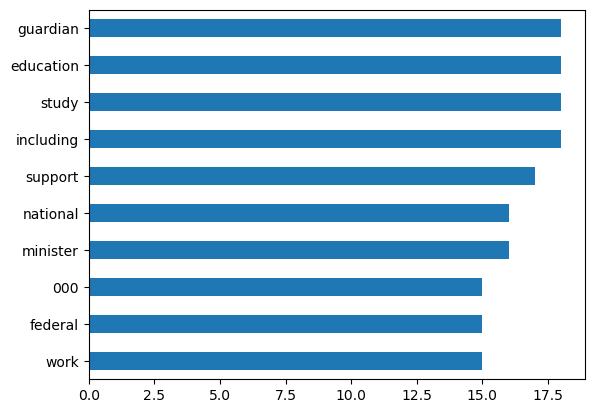

In [29]:
terms_freq_df = pd.DataFrame(index=count_df.keys(),columns=['doc_freq','doc_percentage (%)'])
for idx in terms_freq_df.index:
    terms_freq_df.at[idx,'doc_freq'] = count_df.loc[count_df[idx]>0].shape[0]
    terms_freq_df.at[idx,'doc_percentage (%)'] = round(terms_freq_df.at[idx,'doc_freq']/count_df.shape[0],2)
terms_freq_df.sort_values(by='doc_freq',ascending=True)['doc_freq'].tail(10).plot(kind='barh')

In [30]:
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

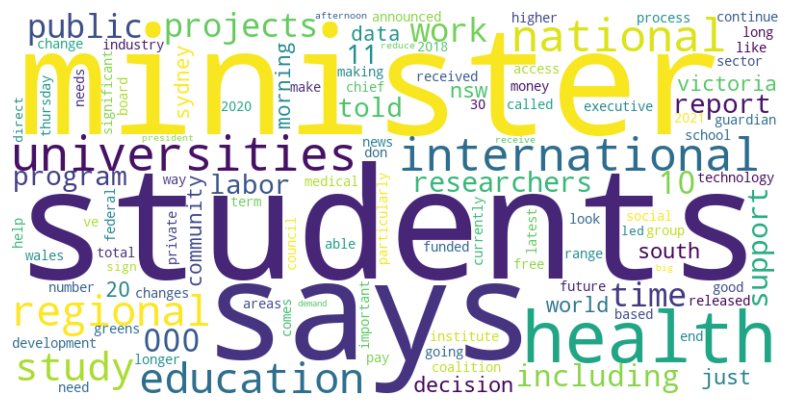

In [31]:
average_tfidf_scores = np.mean(tfidf_df, axis=0)

# Create a dictionary of terms and their average TF-IDF scores
tfidf_dict = dict(zip(feature_names, average_tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()